In [271]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [272]:
one = pd.read_csv('Project1HeavyRainTicketCounts.csv')
two = pd.read_csv('Project1HeavySnowTicketCounts.csv')
three = pd.read_csv('Project1HighTempTicketCounts.csv')
four = pd.read_csv('Project1LightRainTicketTicketCounts.csv')
five = pd.read_csv('Project1LowTempTicketCounts.csv')
six = pd.read_csv('Project1Mid1TempTicketCounts.csv')
seven = pd.read_csv('Project1Mid2TempTicketCounts.csv')
eight = pd.read_csv('Project1ModRainTicketCounts.csv')
nine = pd.read_csv('Project1ModSnowTicketCounts.csv')
ten = pd.read_csv('Project1NoSnowTicketCounts.csv')

In [273]:
df0 = pd.merge(one, two, on = 'Ticket', how = 'outer')
df01 = pd.merge(df0, three, on = 'Ticket', how = 'outer')
df1 = pd.merge(df01, four, on = 'Ticket', how = 'outer')
df2 = pd.merge(df1, five, on = 'Ticket', how = 'outer')
df3 = pd.merge(df2, six, on = 'Ticket', how = 'outer')
df4 = pd.merge(df3, seven, on = 'Ticket', how = 'outer')
df5 = pd.merge(df4, eight, on = 'Ticket', how = 'outer')
df6 = pd.merge(df5, nine, on = 'Ticket', how = 'outer')
df = pd.merge(df6, ten, on = 'Ticket', how = 'outer')

In [274]:
df = df.fillna(0)
df = df.loc[(df['Ticket'] == "3-7-AM-SNOW-ROUTE'") | (df['Ticket'] == "ABANDONED-VEH-FOR-7-DAYS-OR-INOPERABLE'") | (df['Ticket'] == "BLOCK-ACCESS-ALLEY-DRIVEWAY-FIRELANE'") | (df['Ticket'] == "DISABLED-PARKING-ZONE'") | (df['Ticket'] == "DOUBLE-PARKING-OR-STANDING'") | (df['Ticket'] == "EXP-METER-NON-CENTRAL-BUSINESS-DISTRICT'") | (df['Ticket'] == "EXPIRED-METER-CENTRAL-BUSINESS-DISTRICT'") | (df['Ticket'] == "EXPIRED-PLATE-OR-TEMPORARY-REGISTRATION'") | (df['Ticket'] == "EXPIRED-PLATES-OR-TEMPORARY-REGISTRATION'") | (df['Ticket'] == "IMPROPER-DISPLAY-OF-CITY-STICKER'") | (df['Ticket'] == "MISSING-NONCOMPLIANT-FRONT-AND-OR-REAR-PLATE'") | (df['Ticket'] == "NO-CITY-STICKER-VEHICLE-UNDER-EQUAL-TO-16-000-LBS'") | (df['Ticket'] == "NO-STANDING-PARKING-TIME-RESTRICTED'") | (df['Ticket'] == "NONCOMPLIANT-PLATE-S'") | (df['Ticket'] == "OBSTRUCT-ROADWAY'") | (df['Ticket'] == "PARK-ALLEY'") | (df['Ticket'] == "PARK-OR-STAND-IN-BUS-TAXI-CARRIAGE-STAND'") | (df['Ticket'] == "PARK-OR-STAND-ON-CROSSWALK'") | (df['Ticket'] == "PARKING-STANDING-PROHIBITED-ANYTIME'") | (df['Ticket'] == "REAR-AND-FRONT-PLATE-REQUIRED'") | (df['Ticket'] == "REAR-PLATE-REQUIRED-MOTORCYCLE-TRAILER'") | (df['Ticket'] == "RESIDENTIAL-PERMIT-PARKING'") | (df['Ticket'] == "RUSH-HOUR-PARKING'") | (df['Ticket'] == "STAND-PARK-OR-OTHER-USE-OF-BUS-LANE'") | (df['Ticket'] == "STOP-SIGN-OR-TRAFFIC-SIGNAL'") | (df['Ticket'] == "STREET-CLEANING'") | (df['Ticket'] == "TRUCK-RV-BUS-OR-TAXI-RESIDENTIAL-STREET'") | (df['Ticket'] == "WITHIN-15'-OF-FIRE-HYDRANT") | (df['Ticket'] == 'WRONG-DIRECTION-OR-12''-FROM-CURB"')]

In [275]:
category_names = ['Heavy_rain', 'Heavy_snow', 'High_temp', 'Light_rain', 'Low_temp', 'Mid1', 'Mid2', 'Mod_rain', 'Mod_snow', 'No_snow']

keys = []
for index, rows in df.iterrows(): 
    keys.append(rows.Ticket) 
    
values = []
for index, rows in df.iterrows(): 
    my_list =[rows.Heavy_rain, rows.Heavy_snow, rows.High_temp, rows.Light_rain, rows.Low_temp, rows.Mid1, rows.Mid2, rows.Mod_rain, rows.Mod_snow, rows.No_snow] 
    values.append(my_list) 
    
# https://stackoverflow.com/questions/30280856/populating-a-dictionary-using-for-loops-python

In [276]:
results = dict(zip(keys, values))

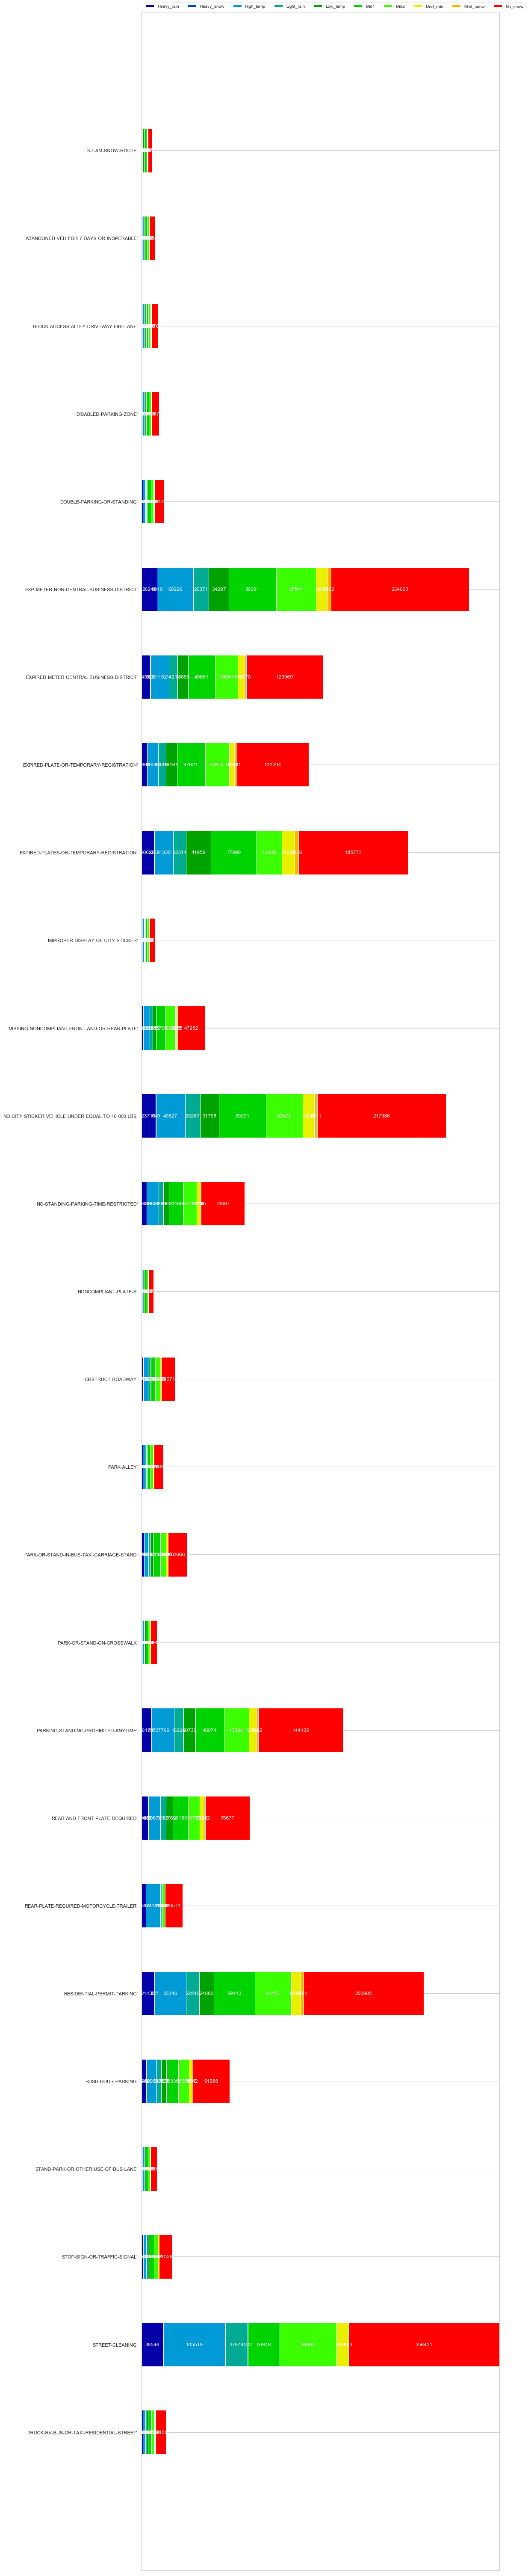

In [277]:
def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('nipy_spectral')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 110))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html

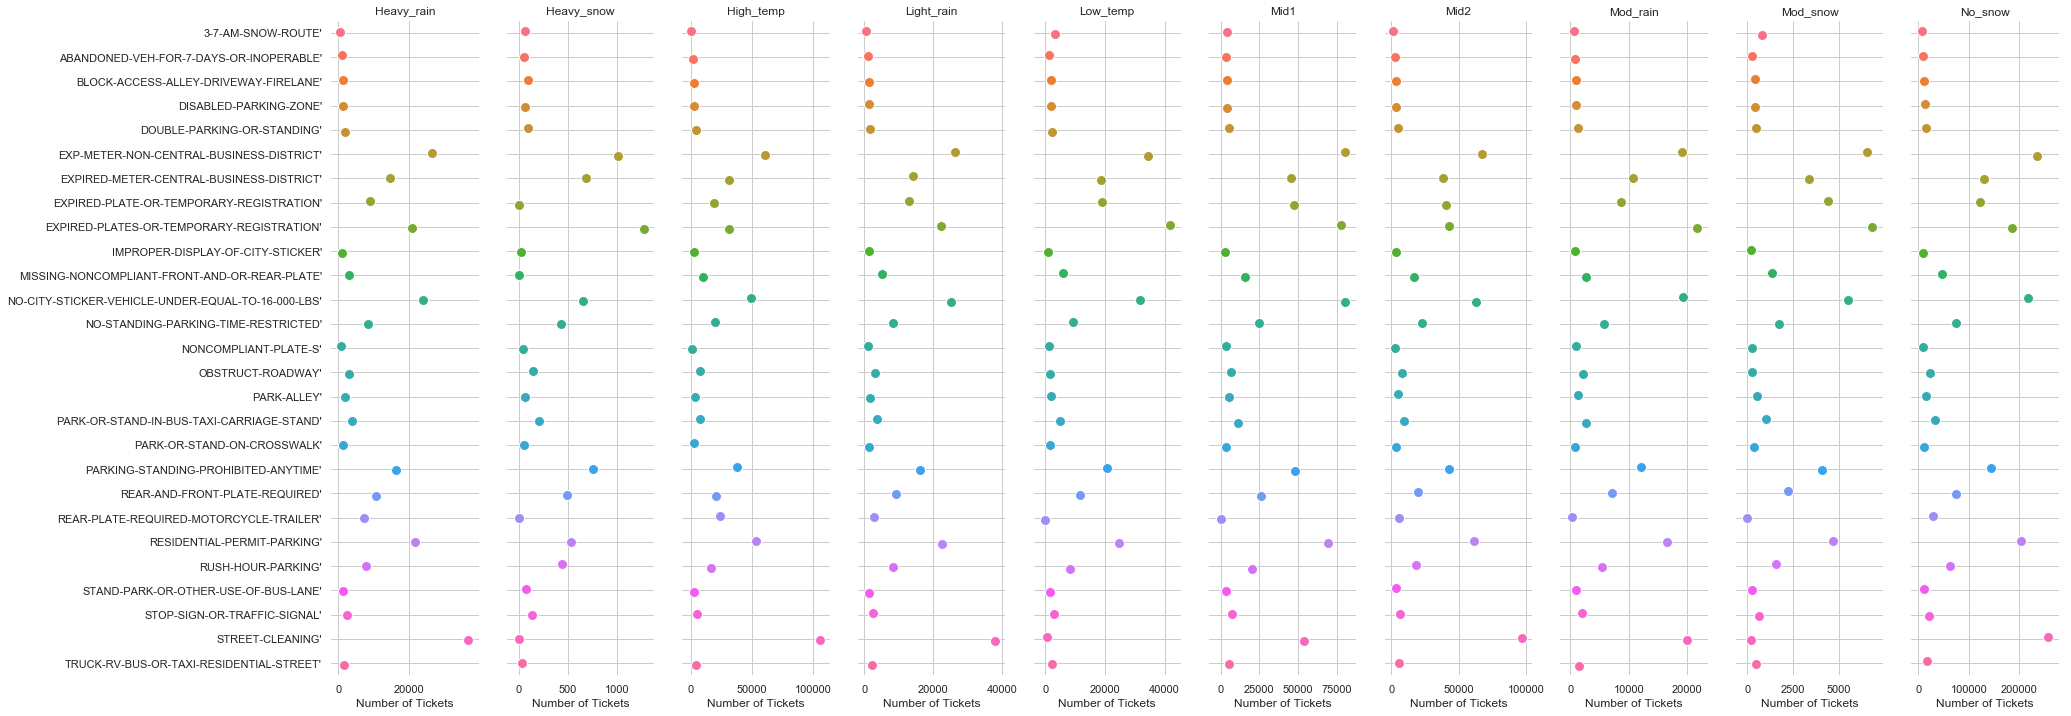

In [278]:

sns.set(style="whitegrid")

g = sns.PairGrid(df,x_vars=df.columns[1:], y_vars=["Ticket"],height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="husl", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Number of Tickets", ylabel="")

# Use semantically meaningful titles for the columns
titles = category_names

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# Nothing surprising here everything looks pretty uniform across different weather - street cleaning is different, but only at the times that they dont clean the street

In [279]:
df = pd.read_csv('Project1AvgPRCPPerTicketType.csv')
# df = df.loc[(df['Ticket'] == "3-7-AM-SNOW-ROUTE'") | (df['Ticket'] == "ABANDONED-VEH-FOR-7-DAYS-OR-INOPERABLE'") | (df['Ticket'] == "BLOCK-ACCESS-ALLEY-DRIVEWAY-FIRELANE'") | (df['Ticket'] == "DISABLED-PARKING-ZONE'") | (df['Ticket'] == "DOUBLE-PARKING-OR-STANDING'") | (df['Ticket'] == "EXP-METER-NON-CENTRAL-BUSINESS-DISTRICT'") | (df['Ticket'] == "EXPIRED-METER-CENTRAL-BUSINESS-DISTRICT'") | (df['Ticket'] == "EXPIRED-PLATE-OR-TEMPORARY-REGISTRATION'") | (df['Ticket'] == "EXPIRED-PLATES-OR-TEMPORARY-REGISTRATION'") | (df['Ticket'] == "IMPROPER-DISPLAY-OF-CITY-STICKER'") | (df['Ticket'] == "MISSING-NONCOMPLIANT-FRONT-AND-OR-REAR-PLATE'") | (df['Ticket'] == "NO-CITY-STICKER-VEHICLE-UNDER-EQUAL-TO-16-000-LBS'") | (df['Ticket'] == "NO-STANDING-PARKING-TIME-RESTRICTED'") | (df['Ticket'] == "NONCOMPLIANT-PLATE-S'") | (df['Ticket'] == "OBSTRUCT-ROADWAY'") | (df['Ticket'] == "PARK-ALLEY'") | (df['Ticket'] == "PARK-OR-STAND-IN-BUS-TAXI-CARRIAGE-STAND'") | (df['Ticket'] == "PARK-OR-STAND-ON-CROSSWALK'") | (df['Ticket'] == "PARKING-STANDING-PROHIBITED-ANYTIME'") | (df['Ticket'] == "REAR-AND-FRONT-PLATE-REQUIRED'") | (df['Ticket'] == "REAR-PLATE-REQUIRED-MOTORCYCLE-TRAILER'") | (df['Ticket'] == "RESIDENTIAL-PERMIT-PARKING'") | (df['Ticket'] == "RUSH-HOUR-PARKING'") | (df['Ticket'] == "STAND-PARK-OR-OTHER-USE-OF-BUS-LANE'") | (df['Ticket'] == "STOP-SIGN-OR-TRAFFIC-SIGNAL'") | (df['Ticket'] == "STREET-CLEANING'") | (df['Ticket'] == "TRUCK-RV-BUS-OR-TAXI-RESIDENTIAL-STREET'") | (df['Ticket'] == "WITHIN-15'-OF-FIRE-HYDRANT") | (df['Ticket'] == 'WRONG-DIRECTION-OR-12''-FROM-CURB"')]

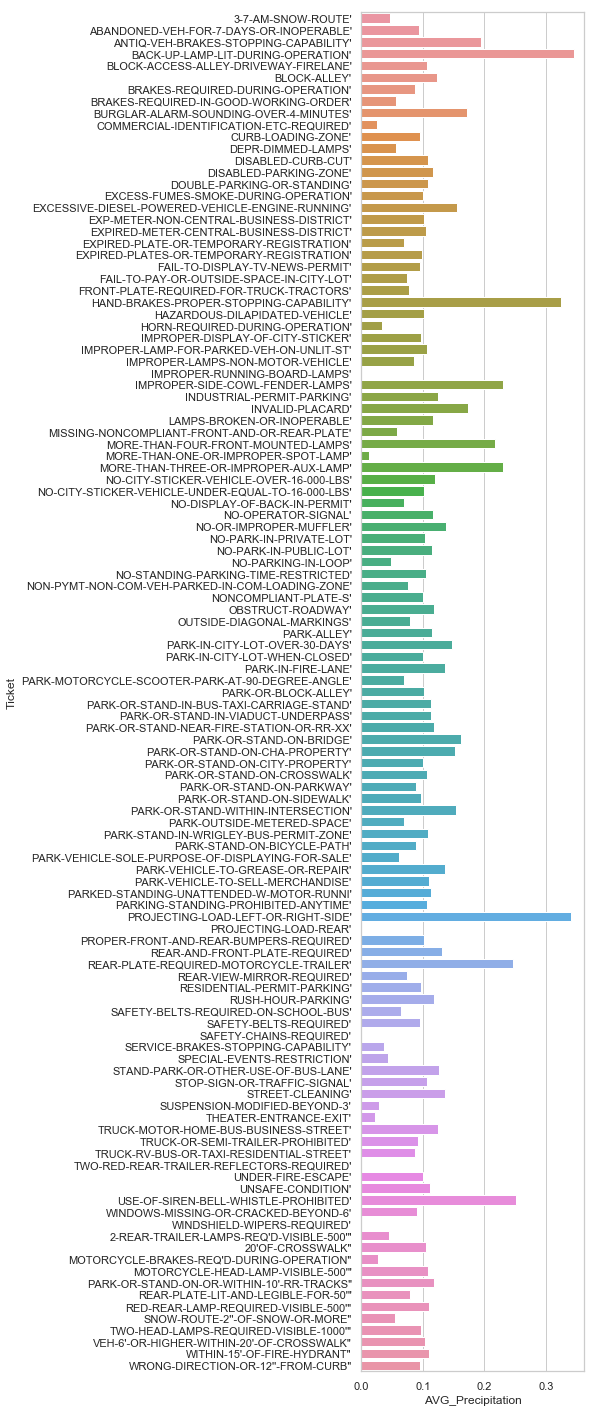

In [280]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(4, 25))

sns.set_color_codes("pastel")
sns.barplot(x='AVG_Precipitation', y='Ticket', data = df)

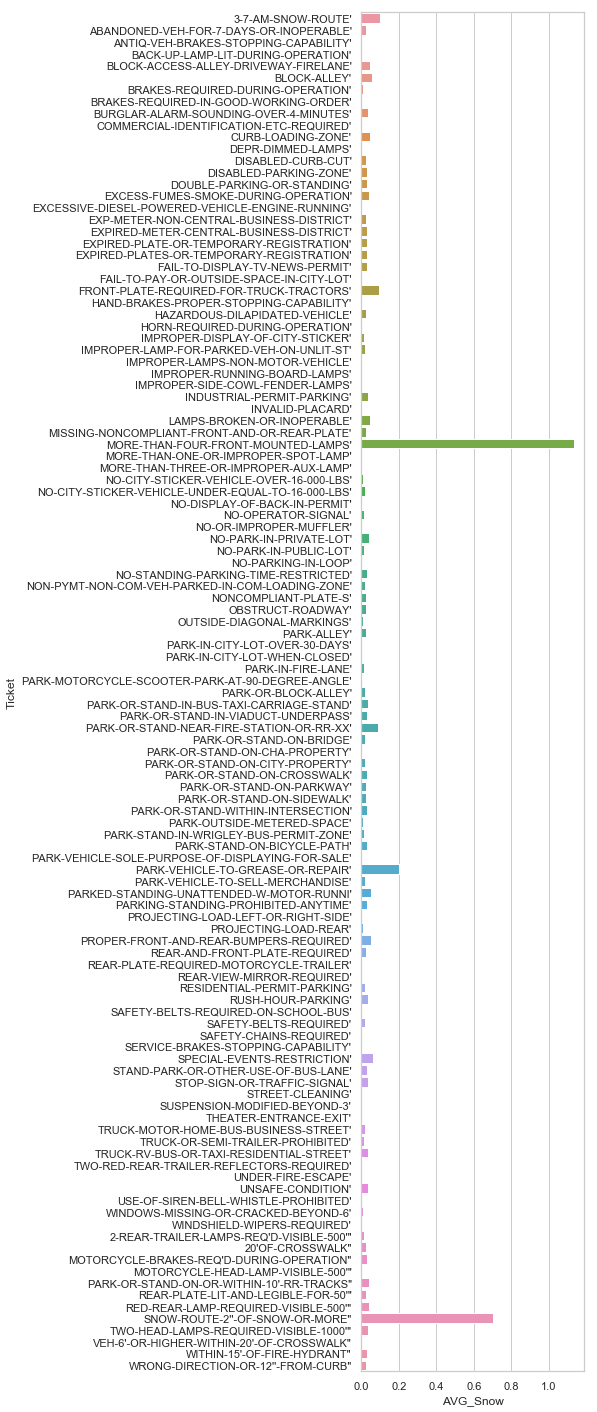

In [281]:
df = pd.read_csv('Project1AvgSNOWPerTicketType.csv')

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(4, 25))

sns.set_color_codes("pastel")
sns.barplot(x='AVG_Snow', y='Ticket', data = df)

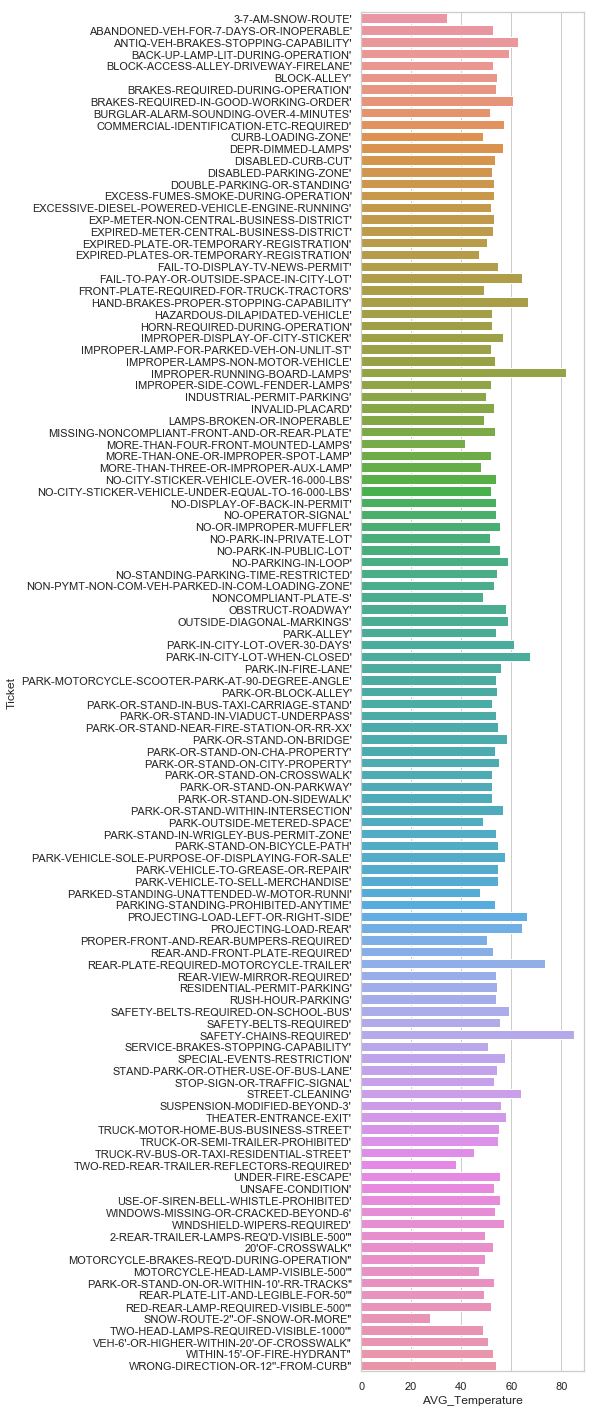

In [282]:
df = pd.read_csv('Project1AvgTAVGPerTicketType.csv')

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(4, 25))

sns.set_color_codes("pastel")
sns.barplot(x='AVG_Temperature', y='Ticket', data = df)

In [283]:
df = pd.read_csv('Project1_Probabilities.csv')

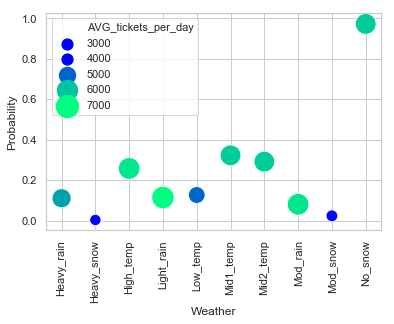

In [284]:
ax = sns.scatterplot(x="Weather", y="Probability", hue="AVG_tickets_per_day", size="AVG_tickets_per_day", sizes=(125, 500), data = df, palette=('winter'))
for item in ax.get_xticklabels():
    item.set_rotation(90)
#https://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot/48297864

# probability comes from the tickets that were issued - the chances that it is a certain type of weather
# this maps really cleanly to the fraction of days a weather type exists in the year which points to weather
# type not having a very noticable effect on 

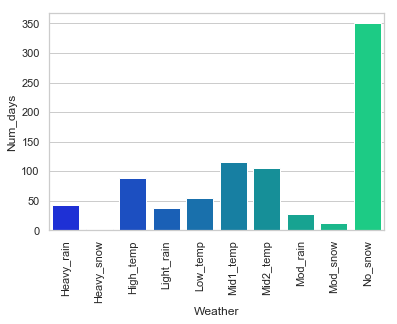

In [285]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Weather", y="Num_days", data = df, palette=('winter'))
for item in ax.get_xticklabels():
    item.set_rotation(90)

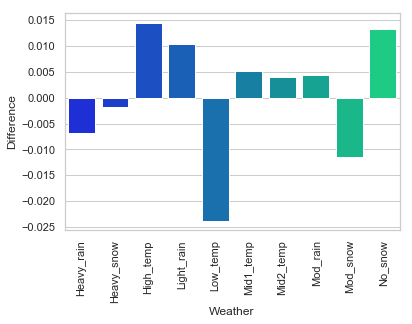

In [286]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Weather", y="Difference", data = df, palette=('winter'))
for item in ax.get_xticklabels():
    item.set_rotation(90)
    
# difference between probability and fraction of days a certain weather exists - really strong giving evidence that 
# weather type doesnt really have an effect on the probability of you getting a ticket  - for heavy snow
# its basically the same between 

# points to the weather type not having much of an influence of if you get a ticket or not

# about a quarter of a percent less likely to get actually get a ticket in a low temp than 

In [287]:
# The probability of getting tickets aligns very strongly with the proportion of weather types, giving strong evidence that weather doesnt have a big effect on the probability of you getting a ticket or not 
# you are less likely to get a ticket for low_temp 